### Ques 8. Using the data from Question 5, write code the analyze the data and answer the following questions

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Ques5.csv')

In [3]:
df.columns

Index(['ID', 'URL', 'Name', 'Season', 'Number', 'Type', 'Airdate', 'Airtime',
       'Average Rating', 'Summary', 'Image link(Medium)',
       'Image link(Original)'],
      dtype='object')

### ● Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
a = df.groupby('Season')['Average Rating'].mean().reset_index()

In [6]:
a

,Season,Average Rating
0,1,8.0900
1,2,8.0000
2,3,7.7750
3,4,7.5375


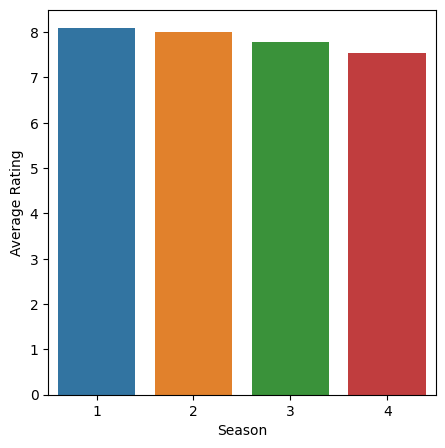

In [7]:
plt.figure(figsize=(5,5))
sns.barplot(y=a['Average Rating'],x=a['Season'])
plt.show()

### ● Get all the episode names, whose average rating is more than 8 for every season

In [8]:
df[df['Average Rating']>8][['Season','Number','Name','Average Rating']]

,Season,Number,Name,Average Rating
6,1,7,Trompe L'Oeil,8.6
8,1,9,The Well-Tempered Clavier,8.5
9,1,10,The Bicameral Mind,8.7
17,2,8,Kiksuya,8.7
18,2,9,Vanishing Point,8.4
19,2,10,The Passenger,8.5


### ● Get all the episode names that aired before May 2019

In [9]:
df['Airdate'][0]

'2016-10-02'

In [10]:
dcopy = df.copy()
dcopy['Aired'] = pd.to_datetime(dcopy['Airdate'])

In [12]:
pd.to_datetime('2019-5-1')

Timestamp('2019-05-01 00:00:00')

In [13]:
dcopy[dcopy['Aired']<pd.to_datetime('2019-5-1')][['Season','Number','Name','Airdate']]

,Season,Number,Name,Airdate
0,1,1,The Original,2016-10-02
1,1,2,Chestnut,2016-10-09
2,1,3,The Stray,2016-10-16
3,1,4,Dissonance Theory,2016-10-23
4,1,5,Contrapasso,2016-10-30
5,1,6,The Adversary,2016-11-06
6,1,7,Trompe L'Oeil,2016-11-13
7,1,8,Trace Decay,2016-11-20
8,1,9,The Well-Tempered Clavier,2016-11-27
9,1,10,The Bicameral Mind,2016-12-04


### ● Get the episode name from each season with the highest and lowest rating

In [14]:
dcopy=df.copy()
dcopy['Rating'] = pd.to_numeric(dcopy['Average Rating'])

In [15]:
high = dcopy.groupby('Season')['Rating'].idxmax()  #to get max rating grouped by season
low = dcopy.groupby('Season')['Rating'].idxmin()  #to get min rating grouped by season

In [16]:
#get details of high and low rating episodes
df1 = dcopy.loc[high, ['Season', 'Number', 'Name', 'Rating']] 
df2 = dcopy.loc[low, ['Season', 'Number', 'Name', 'Rating']]

In [17]:
print("HIGEST RATING EPISODES")
df1

HIGEST RATING EPISODES


,Season,Number,Name,Rating
9,1,10,The Bicameral Mind,8.7
17,2,8,Kiksuya,8.7
20,3,1,Parce Domine,8.0
32,4,5,Zhuangzi,7.8


In [18]:
print("LOWEST RATING EPISODES")
df2

LOWEST RATING EPISODES


,Season,Number,Name,Rating
2,1,3,The Stray,7.6
14,2,5,Akane No Mai,7.6
25,3,6,Decoherence,7.5
28,4,1,The Auguries,7.1


### ● Get the summary for the most popular ( ratings ) episode in every season

In [19]:
high

Season
1     9
2    17
3    20
4    32
Name: Rating, dtype: int64

In [20]:
summ = dcopy.loc[high, ['Season', 'Number', 'Name', 'Rating', 'Summary']] 

In [21]:
summ

,Season,Number,Name,Rating,Summary
9,1,10,The Bicameral Mind,8.7,Delores finds out the truth about William's fa...
17,2,8,Kiksuya,8.7,Another of Westworld's Host revolutionaries is...
20,3,1,Parce Domine,8.0,"If you're stuck in a loop, try walking in a st..."
32,4,5,Zhuangzi,7.8,God is bored.
